**Corona Virus Chroropleth**

I read a tutorial on Geopandas [here](https://https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0). Inspired by this, I tried to create a chloropleth that shows the countries infected by the Corona virus. I started by trying to install Geopandas library in my local computer. I was getting errors while trying to import Geopandas in my Jupyter notebook so I decided to try my luck in Google Colab. 

First I installed the Geopandas library

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.9MB/s 
     |████████████████████████████████| 10.4MB 43.2MB/s 
     |████████████████████████████████| 14.7MB 303kB/s 


Next I mounted my drive so that I can access my data files. The shape files for the World map, I downloaded from [Natural Earth](https://www.naturalearthdata.com/). The Corona virus data, I downloaded from [Worldometers](https://www.worldometers.info/coronavirus/)

In [2]:
!ls

drive  sample_data


Now for importing Geopandas without any issues!!!

In [0]:
import geopandas as gpd

In [0]:
shapefile = 'drive/My Drive/Data/Map/ne_110m_admin_0_countries.shp'

Read shapefile using Geopandas

In [0]:
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

Rename columns

In [6]:
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Removed Antartica as it saves space in the plot

In [7]:
print(gdf[gdf['country'] == 'Antarctica'])

        country country_code                                           geometry
159  Antarctica          ATA  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...


In [0]:
gdf = gdf.drop(gdf.index[159])

Testing to see wheher the plot works. It does so I can now build on this

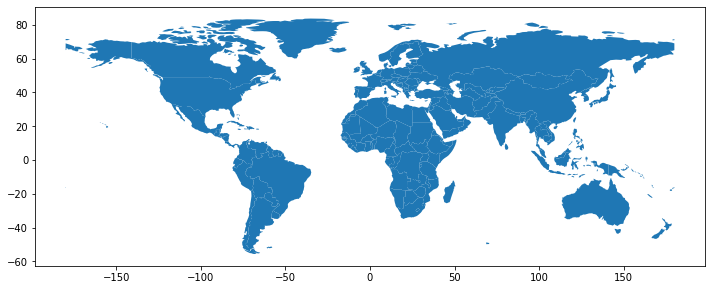

In [9]:
gdf.plot(figsize=(12,8))

In [0]:
import pandas as pd

In [0]:
df = pd.read_excel('drive/My Drive/Data/Map/Corona.xlsx')

In [12]:
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Recovered,Serious Critical
0,China,79828,577.0,2870.0,35.0,34850,42108.0,7365.0
1,South Korea,3736,586.0,20.0,3.0,3686,30.0,10.0
2,Italy,1128,NaN,29.0,NaN,1049,50.0,105.0
3,Iran,978,385.0,54.0,11.0,801,123.0,NaN
4,Japan,252,11.0,6.0,1.0,214,32.0,19.0


The country values in the 2 datasets do not match, so I quickly corrected some of them manually

In [13]:
gdf['country'].sort_values().values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Southern and Antarctic Lands', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia'

Merged the 2 datasets based on Country

In [0]:
gdf = gdf.merge(df, how='left', left_on='country', right_on='Country').fillna(0)

In [15]:
gdf.columns

Index(['country', 'country_code', 'geometry', 'Country', 'Total Cases',
       'New Cases', 'Total Deaths', 'New Deaths', 'Active Cases',
       'Total Recovered', 'Serious Critical'],
      dtype='object')

Plot the chloropleth

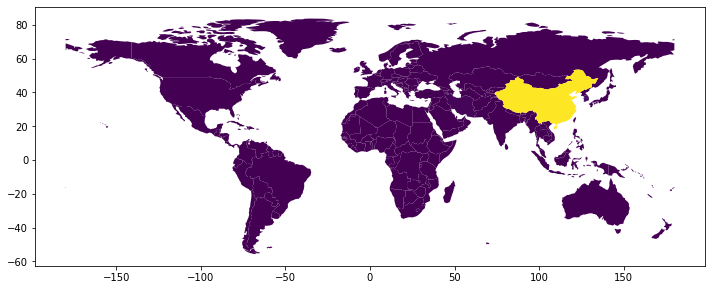

In [16]:
gdf.plot(column='Total Cases', figsize=(12,8))

I expected to see some variability in the colors but because the number of cases in China dwarf the cases in the rest of the world, the other countries all have the same color. 

So let me try to exclude China from the map and see if there is more variability in the map

In [0]:
f1 = ~(gdf['country'] == 'China')

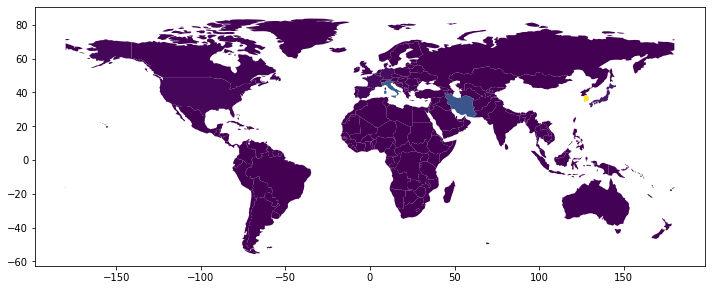

In [18]:
gdf.loc[f1,:].plot(column='Total Cases', figsize=(12,8))

There appears to be some variability. I can now see Italy and /Iran and South Korea in different colors. 

So what insights did we glean this exercise? That this is still a local problem affecting a few countries. The cases in the rest of the world are pretty small. 